<a href="https://colab.research.google.com/github/kevinhl98/modelo-de-prediccion--desercion--exito-academico/blob/main/trabajo_entrega%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from progressbar import progressbar as pbar
from local.lib import mlutils

**dataset**

In [ ]:
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention

In [ ]:
data = pd.read_csv('/content/datos1.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
print(data.shape)

(4424, 35)


In [ ]:
k = data.isna().sum()
k[k!=0]

Age at enrollment                   218
Curricular units 1st sem (grade)    219
Curricular units 2nd sem (grade)    217
dtype: int64

In [ ]:
sns.distplot(data['Target'])

In [ ]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
for c in data.columns:
  print ("%20s"%c, data[c].dtype)

      Marital status int64
    Application mode int64
   Application order int64
              Course int64
Daytime/evening attendance int64
Previous qualification int64
         Nacionality int64
Mother's qualification int64
Father's qualification int64
 Mother's occupation int64
 Father's occupation int64
           Displaced int64
Educational special needs int64
              Debtor int64
Tuition fees up to date int64
              Gender int64
  Scholarship holder int64
   Age at enrollment float64
       International int64
Curricular units 1st sem (credited) int64
Curricular units 1st sem (enrolled) int64
Curricular units 1st sem (evaluations) int64
Curricular units 1st sem (approved) int64
Curricular units 1st sem (grade) float64
Curricular units 1st sem (without evaluations) int64
Curricular units 2nd sem (credited) int64
Curricular units 2nd sem (enrolled) int64
Curricular units 2nd sem (evaluations) int64
Curricular units 2nd sem (approved) int64
Curricular units 2nd sem (gra

In [ ]:
data._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.0,1.000000,1.000000,6.00
Application mode,4424.0,6.886980,5.298964,1.00,1.0,8.000000,12.000000,18.00
Application order,4424.0,1.727848,1.313793,0.00,1.0,1.000000,2.000000,9.00
Course,4424.0,9.899186,4.331792,1.00,6.0,10.000000,13.000000,17.00
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.0,1.000000,1.000000,1.00
Previous qualification,4424.0,2.531420,3.963707,1.00,1.0,1.000000,1.000000,17.00
Nacionality,4424.0,1.254521,1.748447,1.00,1.0,1.000000,1.000000,21.00
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.0,13.000000,22.000000,29.00
Father's qualification,4424.0,16.455244,11.044800,1.00,3.0,14.000000,27.000000,34.00
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.0,6.000000,10.000000,32.00


In [ ]:
## KEEPOUTPUT
cols = ['application order','marital status']
#cols = np.unique(list(np.random.permutation(d._get_numeric_data().columns)[:5])+['SalePrice'])
sns.set()
sns.pairplot(data[cols])

In [ ]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

<ipython-input-13-ab561b8a5728>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


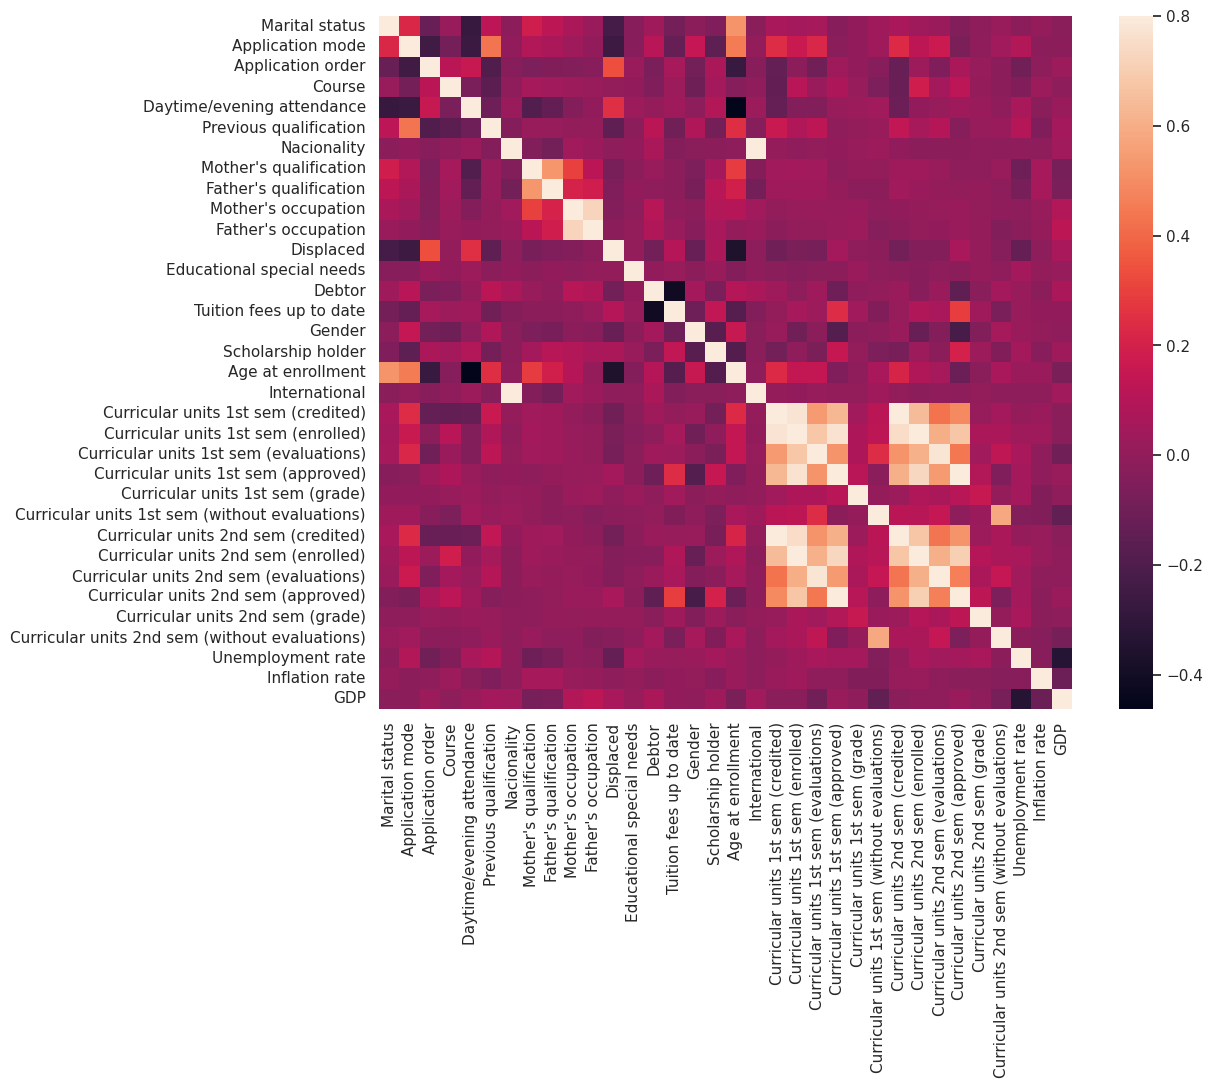

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
ccols = [i for i in data.columns if not i in data._get_numeric_data()]
print (ccols)

['Target']


In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(data[c].dropna()))

    Target ['Dropout' 'Enrolled' 'Graduate']


In [ ]:
k = data.isna().sum()
k[k!=0]

Age at enrollment                   218
Curricular units 1st sem (grade)    219
Curricular units 2nd sem (grade)    217
dtype: int64

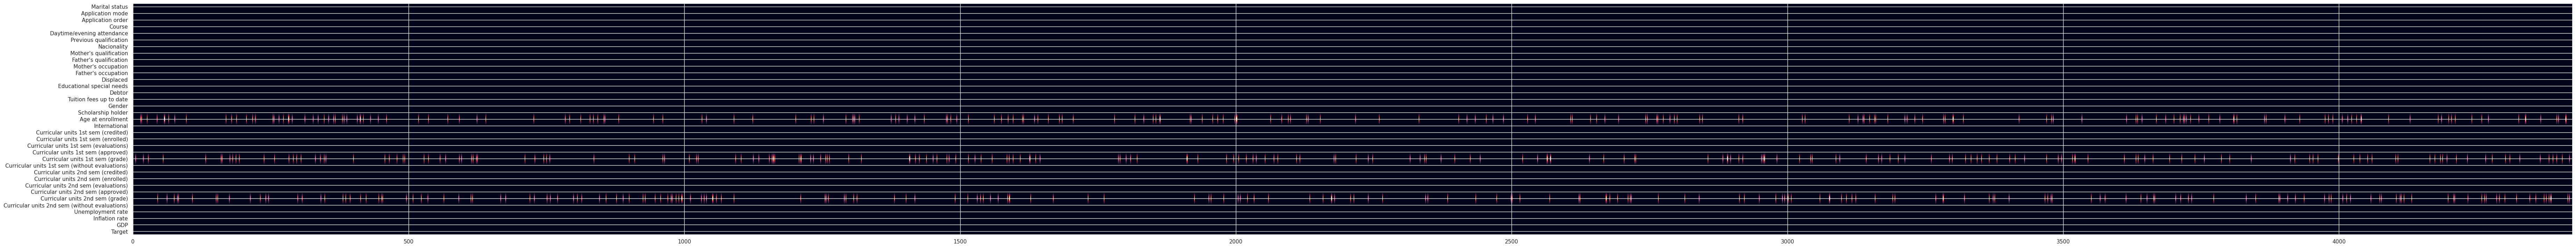

In [ ]:
## KEEPOUTPUT
ax = plt.figure(figsize=(90,15)).add_subplot(111)
ax.imshow(data.isna().values.T)
ax.set_aspect(12)
plt.yticks(range(data.shape[1]), data.columns);

In [ ]:

def plot_missing(col, tar):
    
    def f1(): 
        if data[col].dtype==object:
            k = data[col].fillna("missing").value_counts()
            sns.barplot(k.index, k.values)
        else:
            sns.distplot(data[col].dropna())
        plt.title("distribution of %s"%col)
        plt.grid()
        
    def f2(): 
        if data[col].dtype==object:
            k=data[[col,tar]].dropna()
            for v in data[col].dropna().unique():
                if sum(k[col]==v)>1:
                    sns.distplot(k[tar][k[col]==v], 
                                 hist_kws=dict(alpha=.3), 
                                 kde_kws=dict(linewidth=1, alpha=.8),
                                 label=v);
            if sum(data[col].isna())>1:
                sns.distplot(data[tar][d[col].isna()], 
                             hist_kws=dict(alpha=.8), 
                             kde_kws=dict(linewidth=1, alpha=1),
                             label="missing")
            plt.legend();
        else:
            plt.scatter(data[col], data[tar], alpha=.5)
            plt.xlabel(tar)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs tar"%(col))
        
    def f3(): 
        n = np.sum(data[col].isna())
        if n>1:
            sns.distplot(data[tar][data[col].isna()], color="red",  hist_kws=dict(alpha=.3), label="missing (%d values)"%n)
        sns.distplot(data[tar][~data[col].isna()], color="blue",  hist_kws=dict(alpha=.3), label="ok (%d values)"%(len(d)-n))
        plt.title("distribution of tar wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()
        
    mlutils.figures_grid(3,1, [f1, f2, f3], figsize=(20,3))

In [ ]:
for col in k[k!=0].index:
    plot_missing(col, tar="Target")

In [ ]:
def xdistplot(k, title="", xlim=None):
    vals = k
    sns.distplot(k, hist_kws={"alpha": .8});
    m,s = np.mean(vals), np.std(vals)
    plt.axvline(m, color="black", lw=2, alpha=.5)
    plt.axvline(m+s, color="red", lw=2, alpha=.5)
    plt.axvline(m-s, color="red", lw=2, alpha=.5)
    x = np.linspace(np.min(vals), np.max(vals), 100)
    plt.title(title)
    plt.grid();
    if xlim is not None:
        plt.xlim(xlim)

In [ ]:
def subs_policies(d, col):
    mcol = "%s_missing"%col
    dn = data.T.dropna().T
    dn = dn[[i for i in dn.columns if d[i].dtype!=object]]
    print (dn.shape)
    
    na_idxs = np.argwhere(d[col].isna().values)[:,0]

    dl0 = dn.copy()
    dlm = dn.copy()
    dlr = dn.copy()

    dl0[mcol] = d[col].fillna(0)
    dlm[mcol] = d[col].fillna( d[col].mean())

    k = data[col].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dlr[mcol] = k

    f0 = lambda: xdistplot(d[col].dropna(), "original", [0,150])
    f1 = lambda: xdistplot(dl0[mcol], "subs by zero", [0,150])
    f2 = lambda: xdistplot(dlm[mcol], "subs by mean", [0,150])
    f3 = lambda: xdistplot(dlr[mcol], "subs by equivalent normal", [0,150])

    mlutils.figures_grid(4,1, [f0, f1, f2, f3], figsize=(20,3))
    return dn, dl0, dlm, dlr, na_idxs

In [ ]:
## KEEPOUTPUT
dn, dl0, dlm, dlr, na_idxs = subs_policies(data, "Age at enrollment")